# Hmwk #5 - Regression Analysis

## Problem #1 - Trees

Foresters want to measure the volume of a tree in order to estimate how much lumber they would get for that tree. Knowing the girth and height of the tree, one could apply a cylinder approximation, but the tree does not have a uniform girth along its entire length -- the tree gets much smaller at the top. The UsingR library has a data set "trees", that contains a set of measurements of the girth and height of a tree. Use the library to assess a linear model. For example, you might try:

In [3]:
install.packages('UsingR', repos='http://cran.us.r-project.org')
library(UsingR)
summary(trees)

package 'UsingR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\karthikhandady\AppData\Local\Temp\RtmpOgHTfi\downloaded_packages


Loading required package: MASS
Loading required package: HistData
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, round.POSIXt, trunc.POSIXt, units


Attaching package: 'UsingR'

The following object is masked from 'package:survival':

    cancer



     Girth           Height       Volume     
 Min.   : 8.30   Min.   :63   Min.   :10.20  
 1st Qu.:11.05   1st Qu.:72   1st Qu.:19.40  
 Median :12.90   Median :76   Median :24.20  
 Mean   :13.25   Mean   :76   Mean   :30.17  
 3rd Qu.:15.25   3rd Qu.:80   3rd Qu.:37.30  
 Max.   :20.60   Max.   :87   Max.   :77.00  

** If we look at the regression model **

In [16]:
m = lm(Volume ~ Height + Girth, data=trees)
summary(m)


Call:
lm(formula = Volume ~ Height + Girth, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Height        0.3393     0.1302   2.607   0.0145 *  
Girth         4.7082     0.2643  17.816  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


This provides a model, but doesn't say if it's any good. Do the following using R -- i.e. use the output of the 'lm' linear model where possible. Show your work.

### What is the R^2 for this model

In [17]:
summary(m)$r.squared
#The r^2 values defines how well the Girth and Height correspond to the Volume. 
#The r^2 value is close to 1 meaning that the model is very good. 

[1] 0.94795

### Compute the 95% confidence interval for the Height parameter 
(**nb:** you're being asked to calculate the CI of the parameter from the multi-linear model, not the CI of the Height data itself). To do this, you would use the standard error (shown in the summary of the linear model -- e.g. 0.1302 for parameter Height) for each parameter -- this is the standard error for that parameter derived from the MSE as described in the slides concerning multi-linear regression. You would then conduct the T-distribution using that standard error with n-k-1 degrees of freedom. See the slides on linear regression.

In [33]:
#There are 31 data points (n) and 2 variables (k) so we have 28 degrees of freedom (n-k-1)
#For height the standard error is 0.1302
#Upper bound (Use qt to get the value to multiply the standard error with and add to mean)
qt(0.975,28)*summary(m)$coefficient[2,2]+summary(m)$coefficient[2,1]
#Lower bound (Use qt to get the value to multiply the standard error with and add to mean)
qt(0.025,28)*summary(m)$coefficient[2,2]+summary(m)$coefficient[2,1]


[1] 0.6058538

[1] 0.07264863

### Compute the 95% confidence interval for the Girth parameter 
(**nb:** as above). Verify your value using the **confint** function in R.

In [34]:
#There are 31 data points (n) and 2 variables (k) so we have 28 degrees of freedom (n-k-1)
#For height the standard error is 0.1302
#Upper bound (Use qt to get the value to multiply the standard error with and add to mean)
qt(0.975,28)*summary(m)$coefficient[3,2]+summary(m)$coefficient[3,1]
#Lower bound (Use qt to get the value to multiply the standard error with and add to mean)
qt(0.025,28)*summary(m)$coefficient[3,2]+summary(m)$coefficient[3,1]

confint(m)
#We compare the values to confint and verify that we have the same values.

[1] 5.249482

[1] 4.166839

,2.5 %,97.5 %
(Intercept),-75.68226,-40.29306
Height,0.07264863,0.60585384
Girth,4.166839,5.249482


### Does the Height parameter statistically equal zero? Does the Girth?

In [19]:
#The height and girth parameter do not statistically equal zero. The 95% confidence interval (which means that 
#95% of the time the values will be within that range) lies above 0 meaning that they statistically 
#do not equal zero.

### Complete this sentence:
"For every unit increase in Girth, the Volume increases by ______ and for every unit increase in Height, the Volume increases by ______"

In [12]:
#To solve the problem we look to the slopes of each variable
#For every unit increase in Girth, the Volume increases by 4.7082 and for every unit increase in Height,
#the Volume increases by 0.3393

## Problem #2 - Body Fat

In [115]:
summary(fat)


      case           body.fat     body.fat.siri      density     
 Min.   :  1.00   Min.   : 0.00   Min.   : 0.00   Min.   :0.995  
 1st Qu.: 63.75   1st Qu.:12.80   1st Qu.:12.47   1st Qu.:1.041  
 Median :126.50   Median :19.00   Median :19.20   Median :1.055  
 Mean   :126.50   Mean   :18.94   Mean   :19.15   Mean   :1.056  
 3rd Qu.:189.25   3rd Qu.:24.60   3rd Qu.:25.30   3rd Qu.:1.070  
 Max.   :252.00   Max.   :45.10   Max.   :47.50   Max.   :1.109  
      age            weight          height           BMI       
 Min.   :22.00   Min.   :118.5   Min.   :29.50   Min.   :18.10  
 1st Qu.:35.75   1st Qu.:159.0   1st Qu.:68.25   1st Qu.:23.10  
 Median :43.00   Median :176.5   Median :70.00   Median :25.05  
 Mean   :44.88   Mean   :178.9   Mean   :70.15   Mean   :25.44  
 3rd Qu.:54.00   3rd Qu.:197.0   3rd Qu.:72.25   3rd Qu.:27.32  
 Max.   :81.00   Max.   :363.1   Max.   :77.75   Max.   :48.90  
    ffweight          neck           chest           abdomen      
 Min.   :105.9  

The Body Mass Index (BMI) is a model to predict the percentage of body fat based on your weight and height. The VMI is defined as the ratio of weight (in kilograms) to the square of height (in metres). A BMI of 18.5 to 25 is considered "healthy", a BMI of 25 to 30 is "overweight" and a BMI over 30 is "obese". The dataset 'fat' from UsingR contains 19 factors. The true body fat is body.fat and BMI field is the BMI.



### Using the 'fat' data set, build a linear model
of the body.fat predicted by BMI.
Describe the linear model -- what are the intercept and slope.
What is the $r^2$ of that model?


In [11]:
bf = lm(body.fat ~ BMI, data=fat)
#For the linear model we directly compare body fat as modeled by BMI.
summary(bf)
#The intercept is what the body fat would be if the BMI was equal to 0 (which is impossible because your weight
#would have to be 0, hence the reason for the intercept of -20.4).
#The slope is 1.55 and that means for every unit increase of the BMI the body fat increases by 1.55 units. 
summary(bf)$r.squared
#The r^2 is 0.52998 which means the model is very poor and there is little correlation.



Call:
lm(formula = body.fat ~ BMI, data = fat)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.4292  -3.4478   0.2113   3.8663  11.7826 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20.40508    2.36723   -8.62 7.78e-16 ***
BMI           1.54671    0.09212   16.79  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.324 on 250 degrees of freedom
Multiple R-squared:   0.53,	Adjusted R-squared:  0.5281 
F-statistic: 281.9 on 1 and 250 DF,  p-value: < 2.2e-16


[1] 0.5299755

### Come up with a minimal model that predicts body.fat using the other factors with an R2 of at least 0.72
We will use these different factors to come up with a minimal model that predicts body.fat using the other factors with an R2 of at least 0.72. Each factor in the final model should be significant at the 95% level -- this means that the confidence interval of the parameter at the 95% confidence level should not include zero. 

Include your description showing both your final result and the process by which you achieve that result. Your model shouldn't use the "density" or "body.fat.siri" factors, as those are the "gold standard" measurements used to calculate body fat (using a dunk tank). I'm not certain what "ffweight" is, but don't use that either.

You may want to understand the "p-value" for problem - basically, the p-value is the probability of observing a value at least as large as the "t-value" (which is the estimate / std. error). Effectively, this is providing a way to determine if that value is statistically equal to zero.

You should describe the process you use, not just the end result. You should also insure that the linear model is valid, meaning that the predictors are not correlated, etc. Wikipedia has a good article on such "stepwise refinement" mechanisms [ http://en.wikipedia.org/wiki/Stepwise_regression ]. See also the discussion on page 125 of the book by Faraway on Practical Regression Analysis using R (on the couse web page or http://cran.r-project.org/doc/contrib/Faraway-PRA.pdf). They describe a "backward" and "forward" mechanism where you either start with all terms & toss some away or start adding terms to a null model.

In [113]:
#First we create a linear model with all available factors (minus the explicitly excluded factors stated)
#We are performing backward elimination so we must start with all available factors
nf= lm(body.fat ~ age+weight+height+BMI+neck+chest+abdomen+hip+thigh+knee+ankle+bicep+forearm+wrist,data=fat)
#Now we look at the p-values of the coefficients and discard any factor with p-value above 0.05 (not significant)
nf = update(nf,.~.-knee)
nf = update(nf,.~.-BMI)
nf = update(nf,.~.-chest)
nf = update(nf,.~.-height)
nf = update(nf,.~.-ankle)
nf = update(nf,.~.-bicep)
nf = update(nf,.~.-hip)
nf = update(nf,.~.-neck)
nf = update(nf,.~.-thigh)
nf = update(nf,.~.-age)
#At this point all variables have b values under 0.05 so we simply remove the highest p-value
nf = update(nf,.~.-forearm)
#The model stays above 0.72 with forearm removed but the removal of any further variables lowers the
#r^2 value to below 0.72 meaning we have reached the minimum number of variables
summary(nf)
#We are left with weight,abdomen,and wrist as the variables that estimate the body.fat


Call:
lm(formula = body.fat ~ weight + abdomen + wrist, data = fat)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1509  -2.9833  -0.1719   2.9955   9.1195 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.76129    6.31599  -3.920 0.000114 ***
weight       -0.10558    0.02191  -4.820 2.51e-06 ***
abdomen       0.90191    0.05202  17.338  < 2e-16 ***
wrist        -1.14570    0.40412  -2.835 0.004959 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.07 on 248 degrees of freedom
Multiple R-squared:  0.7276,	Adjusted R-squared:  0.7243 
F-statistic: 220.8 on 3 and 248 DF,  p-value: < 2.2e-16


## Problem #3 - Wireless networks

This data contains measurements from 3 wireless network devices. One is an 802.11 "Wifi" interface running at 1Mbs/s. The second is that same interface running at 11Mb/s. Lastly, the same interface running at 54Mb/s. The data is stored as R vectors named x1, y1, x11, y11 and x54, y54. The X value is the packet size for the time measurement recorded at the corresponding Y value. The units are milliseconds. For example, x11[1] is 350 bytes and y11[1] is 1.436782 millseconds. It took 1.436782 milliseconds to transmit a 350 byte packet.

In [116]:
x11 = c(350, 350, 350, 350, 350, 450, 450, 450, 450, 450, 550, 550, 550,
550, 550, 650, 650, 650, 650, 650, 750, 750, 750, 750, 750, 850, 850,
850, 850, 850, 950, 950, 950, 950, 950, 1050, 1050, 1050, 1050, 1050,
1150, 1150, 1150, 1150, 1150, 1250, 1250, 1250, 1250, 1250, 1350,
1350, 1350, 1350, 1350, 1450, 1450, 1450, 1450, 1450 )

y11 = c(
1.436782, 1.407063, 1.436782, 1.426737, 1.416832, 1.50015, 1.533978,
1.50015, 1.522533, 1.511259, 1.619433, 1.619433, 1.576541, 1.576541,
1.587050, 1.682935, 1.662787, 1.693193, 1.682935, 1.693193, 1.745505,
1.755310, 1.765225, 1.755310, 1.755002, 1.833853, 1.805054, 1.824152,
1.853568, 1.853568, 1.915342, 1.915342, 1.915342, 1.904762, 1.915342,
1.992429, 1.982161, 1.992429, 1.961169, 1.971998, 2.072539, 2.052124,
2.062281, 2.062281, 2.082466, 2.15378, 2.143623, 2.133561, 2.113718,
2.103934, 2.182453, 2.182453, 2.182453, 2.154244, 2.182453, 2.241147,
2.26142, 2.241147, 2.301496, 2.282063)

x1 = c( 350, 350, 350, 350, 350, 450, 450, 450, 450, 450, 550, 550,
550, 550, 550, 650, 650, 650, 650, 650, 750, 750, 750, 750, 750, 850,
850, 850, 850, 850, 950, 950, 950, 950, 950, 1050, 1050, 1050, 1050,
1050, 1150, 1150, 1150, 1150, 1150, 1250, 1250, 1250, 1250, 1250,
1350, 1350, 1350, 1350, 1350, 1450, 1450, 1450, 1450, 1450)

y1 = c( 4.161465, 4.078303, 4.078303, 4.078303, 4.078303, 4.741584,
4.741584, 4.741584, 4.741584, 4.741584, 5.534034, 5.534034, 5.534034,
5.534034, 5.534034, 6.30517, 6.30517, 6.30517, 6.30517, 6.30517,
7.097232, 7.097232, 7.097232, 6.939625, 7.097232, 7.830854, 7.830854,
7.830854, 7.830854, 7.830854, 8.403361, 8.403361, 8.403361, 8.403361,
8.403361, 9.14913, 9.14913, 9.14913, 9.14913, 9.14913, 9.910803,
9.910803, 9.910803, 9.910803, 9.910803, 10.81081, 10.81081, 10.55966,
10.81081, 10.81081, 11.60093, 11.60093, 11.33787, 11.33787, 11.33787,
12.16545, 12.16545, 12.16545, 12.16545, 12.16545)

x54 = c( 350, 350, 350, 350, 450, 450, 450, 450, 550, 550, 550, 550,
650, 650, 650, 650, 750, 750, 750, 750, 850, 850, 850, 850, 950, 950,
950, 950, 1050, 1050, 1050, 1050, 1150, 1150, 1150, 1150, 1250, 1250,
1250, 1250, 1350, 1350, 1350, 1350, 1450, 1450, 1450, 1450)

y54 = c( 0.2812386, 0.2804341, 0.2798769, 0.2815553, 0.2995088,
0.2986679, 0.3006705, 0.298454, 0.311886, 0.3199386, 0.3163556,
0.3186439, 0.3333333, 0.3369953, 0.3340236, 0.3311258, 0.3412969,
0.3373933, 0.341006, 0.3411456, 0.3531198, 0.3563284, 0.3578714,
0.3521871, 0.3733154, 0.3752768, 0.3761803, 0.3780432, 0.3957888,
0.3914660, 0.3928656, 0.3961651, 0.4116921, 0.4088307, 0.4083966,
0.4038935, 0.4210704, 0.4251339, 0.4259488, 0.4252243, 0.4428698,
0.4405869, 0.4386157, 0.4402959, 0.4577287, 0.4561211, 0.4573938,
0.4607658)

### Answer the following questions:

To answer these questions, you should use the lecture slides on linear regression and section 13 from the SimpleR.pdf book from the course website (page 77). You can also refer to the material by Boudec, but his write-up is, as per normal, complex.

* Using R as a calculator, but not using the built-in regression functions, calculate using the equations in the Linear Regression slides:
* The slope (b) and intercept (a) of the regression model for the 1Mb/s network (using x1, y1)
* The coefficient of determination for the model for the 1Mb/s network (using x1,y1)
* The standard deviation for slope & intercept and the 95% confidence interval for the 1Mb/s network (using x1,y1)
* The predicted time, standard deviation and 95% confidence interval for the predicted time to transmit a 40 byte Wifi packet for the 1Mb/s network (using x1,y1)
* The predicted time, standard deviation and 95% confidence interval to transmit a 750 byte packet for the 1Mb/s network (using x1,y1)

In [151]:
#First use slope equation to determine the slope
slope=(length(x1)*sum(x1*y1)-sum(x1)*sum(y1))/(length(x1)*sum(x1^2)- sum(x1)^2)
slope
#Plug slope value into intercept equation to get the intercept value
intercept=(sum(y1)-slope*sum(x1))/length(x1)
intercept
#Next plug in the values into the coefficient of determination equation
codeter=((length(x1)*sum(x1*y1)-sum(x1)*sum(y1))/(sqrt(length(x1)*sum(x1^2)-sum(x1)^2)*sqrt(length(y1)*sum(y1^2)-sum(y1)^2)))^2
codeter
#Next we calculate the standard deviation for the slope using the equation
stdslope=sqrt(sum((y1-(slope*x1+intercept))^2)/(length(y1)-2))/sqrt(sum((x1-mean(x1))^2))
stdslope
#Next we calculate the standard deviation for the intercept using the equation
stdintercept=sqrt(sum((y1-(slope*x1+intercept))^2)/(length(y1)-2))*sqrt((1/length(x1))+(mean(x1)^2/(sum((x1-mean(x1))^2))))
stdintercept
#Now we get the 95% confidence interval
confintupbound=qt(0.975,length(x1)-2)*stdslope+qt(0.975,length(x1)-2)*stdintercept
confintlowbound=qt(0.025,length(x1)-2)*stdslope+qt(0.025,length(x1)-2)*stdintercept

#To find predicted time we just plug in x=40 into our equation
pretime40=slope*40+intercept
pretime40
#To get the standard deviation we just plug it into the equation
stdpretime40 = sum((y1-(slope*x1+intercept))^2)/(length(y1)-2)
stdpretime40
#To get the 95% confidence interval we just get the t-value and multiply it by the std and add it to the average
pretimeconf40upbound= pretime40 + qt(0.975,length(x1)-2)*stdpretime40
pretimeconf40lowbound= pretime40 + qt(0.025,length(x1)-2)*stdpretime40
pretimeconf40upbound
pretimeconf40lowbound

#To find predicted time we just plug in x=750 into our equation
pretime750 = slope*750+intercept
pretime750
#To get the standard deviation we just plug it into the equation
stdpretime750= sum((y1-(slope*x1+intercept))^2)/(length(y1)-2)
stdpretime750
#To get the 95% confidence interval we just get the t-value and multiply it by the std and add it to the average
pretimeconf750upbound= pretime750 + qt(0.975,length(x1)-2)*stdpretime750
pretimeconf750lowbound= pretime750 + qt(0.025,length(x1)-2)*stdpretime750
pretimeconf750upbound
pretimeconf750lowbound


#We compare some of the above values with the build in function and verify that they are accurate
yea= lm(y1~x1)
summary(yea)

[1] 0.007361049

[1] 1.492115

[1] 0.9991551

[1] 2.81074e-05

[1] 0.02709365

[1] 1.786557

[1] 0.005648685

[1] 1.797864

[1] 1.77525

[1] 7.012901

[1] 0.005648685

[1] 7.024209

[1] 7.001594


Call:
lm(formula = y1 ~ x1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.133766 -0.065274 -0.003422  0.081848  0.171399 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.492e+00  2.709e-02   55.07   <2e-16 ***
x1          7.361e-03  2.811e-05  261.89   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07516 on 58 degrees of freedom
Multiple R-squared:  0.9992,	Adjusted R-squared:  0.9991 
F-statistic: 6.859e+04 on 1 and 58 DF,  p-value: < 2.2e-16


### Settle a law suit

Using the 'lm' functions in R or the simple.lm functions from the UsingR package (documented in the Simple R guide, section 13 page 77), answer the following questions
* Prepare a plot of the data, the regression model and the 95% confidence interval for each of the data sets. Label the plot with the parameters of the regression model. If you plot all the data on a single plot, you can put the parameters in the legend rather than the title.
* Larry the Lawyer wants to sue because the 11Mb/s network is not 11 times "faster" than the 1Mb/s network. Compare the slope (time per byte) and intercept (overhead per packet). Is the 11Mb/s network 11 times faster at a 95% confidence level? Is the overhead different?
* Using your models, predict the time to transmit a 40 byte packet using each network (using a 95% confidence interval). What's Larry doing now (i.e. crying or filiing a suit?)
* Repeat that for a 750 and 1500 byte packet. Does Larry still have a case? What if you compare the time to transmit a 40 byte packet to a 1500 byte packet, which is 37 times bigger?
* For the 54Mb/s data, argue that the regression model is or is not appropriate for the data. Use the full range of techniques described in Jain and in class. Are there specific measurement samples which seem to be more problematic than others? Which ones?


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
   1.492115     0.007361  


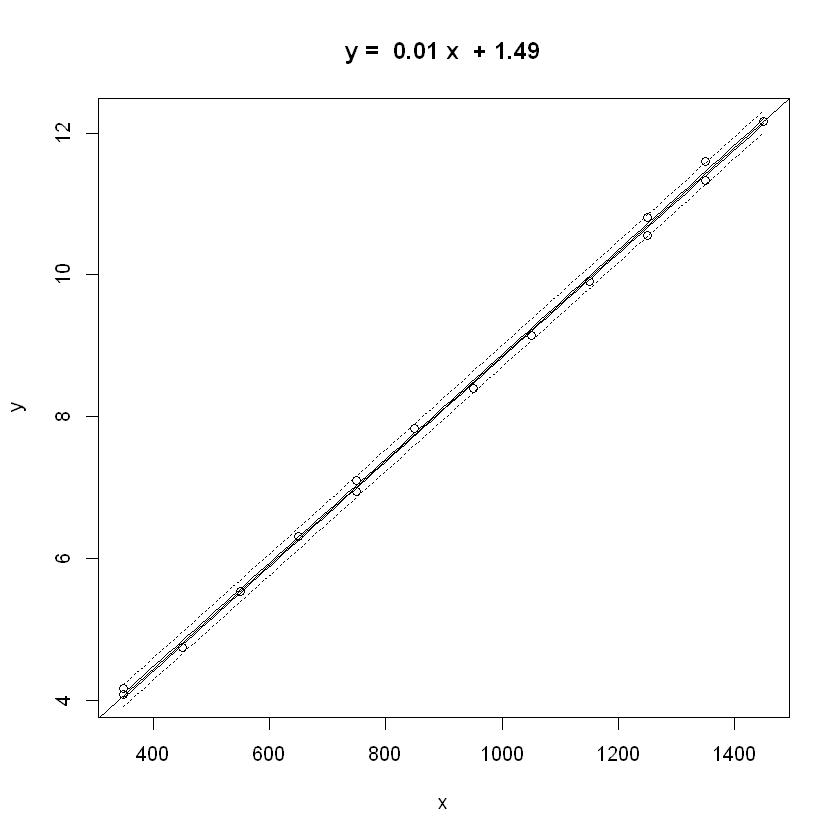


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
  1.1810648    0.0007561  


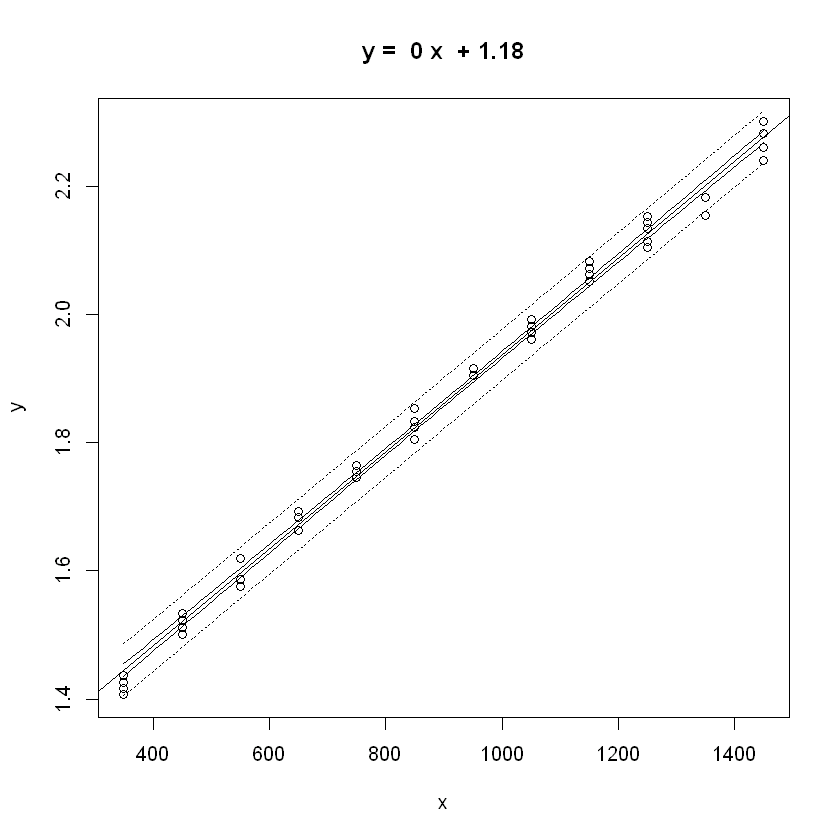


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
  0.2263869    0.0001583  


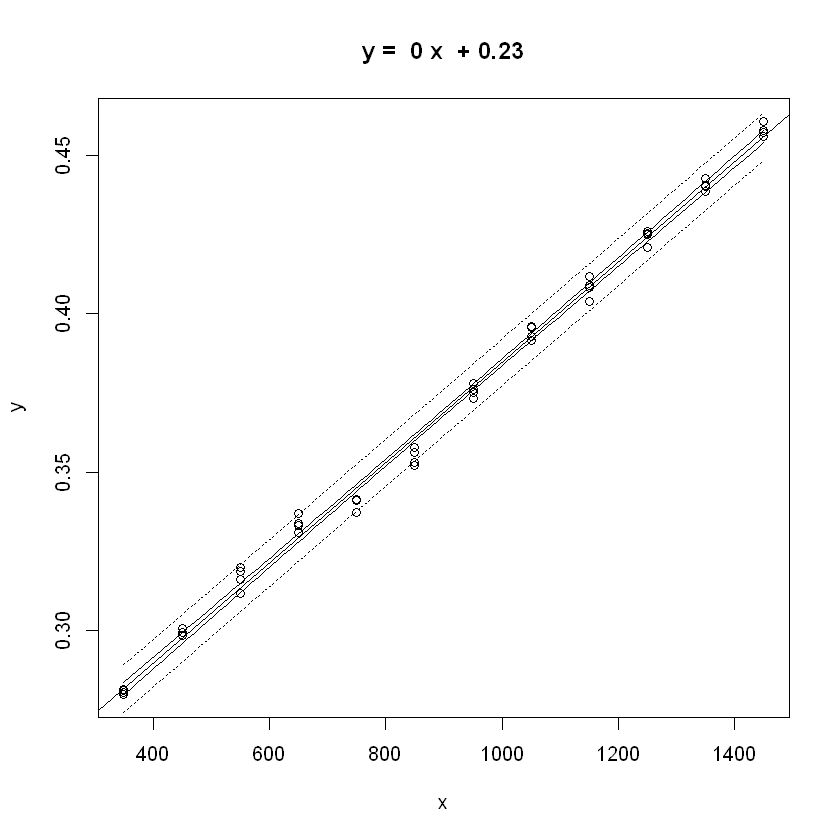

In [160]:
#Below are the 3 data plots
a1=lm(y1~x1)
a2=lm(y11~x11)
a3=lm(y54~x54)
simple.lm(x1, y1, show.ci=TRUE, conf.level=0.95)
simple.lm(x11, y11, show.ci=TRUE, conf.level=0.95)
simple.lm(x54, y54, show.ci=TRUE, conf.level=0.95)

#The slope of the 11Mb/s network is 9.735 times larger than the slope of the 1Mb/s network and the
#95% confidence interval for the slope of the 1Mb/s and 11Mb/s is less than 11 times. 
#The overhead is different because the 95% confidence interval of the intercepts do not overlap.
#The overhead for the 1Mb/s connection is higher.

#To get transmit time we simply plug 40 into x in the equations.
#Time it takes to transmit a 40 byte packet is  1.730-1.843,  1.197-1.226, and 0.230-0.235 seconds. 
#Larry would see that the values for the 1Mb/s and 11Mb/s are no where near 11 times each other he would be filing a suit.

#Time it taks to transmit a 750 byte packet is  6.916-7.109, 1.723-1.773, and 0.340-0.350 seconds.

#Time it taks to transmit a 1500 byte packet is  12.395-12.672, 2.278-2.351, and 0.456-0.471 seconds.
#Larry would still have a case at 1500 bytes as the 11Mb/s connection is still less than 11 times faster.
#Time difference from 40 byte to 1500 byte is  10.66-10.83, 1.081-1.1254, and 0.226-0.236 seconds.
#This difference shows how the speeds become comparable as the byte size increases but the numbers are still less than 11. 
#For 54Mb/s the regression model is accurate for the data because the confidence interval
#remains positive and while the model's slope is very close to zero it still remains above
#zero. The data on the other hand could be increased to have larger data size to give 
#more accurate models.